<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 실습 내용

- Boston 데이터를 대상으로 모델링를 진행합니다.
- 개별 알고리즘으로 모델을 만들어 성능을 확인합니다.
- Stacking 앙상블을 사용해 모델을 만들어 성능을 확인합니다.

# 1.환경 준비

- 기본 **라이브러리**와 대상 **데이터**를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/diabetes.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 **충분히 이해**할 수 있도록 다양한 **탐색** 과정을 수행합니다.

In [3]:
# 상위 몇 개 행 확인
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# 하위 몇 개 행 확인
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


**데이터설명**

피마 인디언 당뇨 데이터셋은 몇 명의 여성 피마 인디언의 진료 자료와 진단 후 5년 내 당뇨 발병 여부로 구성됨

- Pregnancies: 임신 횟수
- Glucose: 포도당 부하 검사 수치
- BloodPressure: 혈압(mm Hg)
- SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
- Insulin: 혈청 인슐린(mu U/ml)
- BMI: 체질량지수(체중(kg)/키(m))^2
- DiabetesPedigreeFunction: 당뇨 내력 가중치 값
- Age: 나이
- Outcome: 클래스 결정 값(0 또는 1)

**diabetes**

- 당뇨병(糖尿病, diabetes)은 높은 혈당 수치가 오랜 기간 지속되는 대사 질환이다. 
- 혈당이 높을 때의 증상으로는 소변이 잦아지고, 갈증과 배고픔이 심해진다. 
- 이를 치료하지 않으면 다른 합병증을 유발할 수 있다.
(출처: 위키백과)

In [5]:
# 변수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# 3.데이터 준비

- **전처리** 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

In [6]:
# target 확인
target = 'Outcome'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

**2) 학습용, 평가용 데이터 분리**

In [7]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022) 


# 4.모델링

- 본격적으로 모델을 **선언**하고 **학습**하고 **평가**하는 과정을 진행합니다.
- 우선 **회귀** 문제인지 **분류** 문제인지 명확히 구분합니다.

## 4.1.Decision Tree 모델링

- Decision Tree 알고리즘으로 모델링하고 성능을 확인합니다.

In [8]:
# 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *

# 선언하기
model = DecisionTreeClassifier()

# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 성능정보 수집
result = {}
result['Decision Tree'] = accuracy_score(y_test, y_pred)

[[127  34]
 [ 35  35]]
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       161
           1       0.51      0.50      0.50        70

    accuracy                           0.70       231
   macro avg       0.65      0.64      0.64       231
weighted avg       0.70      0.70      0.70       231



## 4.2.KNN 모델링

- KNN 알고리즘으로 모델링하고 성능을 확인합니다.

In [9]:
# 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

# 선언하기
model = KNeighborsClassifier()

# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 성능정보 수집
result['KNN'] = accuracy_score(y_test, y_pred)

[[134  27]
 [ 30  40]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       161
           1       0.60      0.57      0.58        70

    accuracy                           0.75       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.75      0.75      0.75       231



## 4.3.Logistic Regression 모델링

- Logistic Regression알고리즘으로 모델링하고 성능을 확인합니다.

In [10]:
# 불러오기
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

# 선언하기
model = LogisticRegression(max_iter=1000)

# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 성능정보 수집
result['Logistic Regression'] = accuracy_score(y_test, y_pred)

[[147  14]
 [ 35  35]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       161
           1       0.71      0.50      0.59        70

    accuracy                           0.79       231
   macro avg       0.76      0.71      0.72       231
weighted avg       0.78      0.79      0.78       231



## 4.4.LightGBM 모델링

- LightGBM 알고리즘으로 모델링하고 성능을 확인합니다.

In [11]:
# 불러오기
from lightgbm import LGBMClassifier
from sklearn.metrics import *

# 선언하기
model = LGBMClassifier()

# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 성능정보 수집
result['LightGBM'] = accuracy_score(y_test, y_pred)

[[133  28]
 [ 34  36]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       161
           1       0.56      0.51      0.54        70

    accuracy                           0.73       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.73      0.73      0.73       231



## 4.5.Stacking 모델링

- Stacking 앙상블을 사용해 모델링하고 성능을 확인합니다.

In [12]:
# 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from lightgbm import LGBMClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import *

# 선언하기
estimators = [('dt', DecisionTreeClassifier()),
              ('knn', make_pipeline(MinMaxScaler(), KNeighborsClassifier())),
              ('lr', LogisticRegression(max_iter=1000)),
              ('lgb', LGBMClassifier())]

model = StackingClassifier(estimators=estimators,
                           final_estimator= RandomForestClassifier())

# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 성능정보 수집
result['Stacking'] = accuracy_score(y_test, y_pred)

[[139  22]
 [ 32  38]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       161
           1       0.63      0.54      0.58        70

    accuracy                           0.77       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.76      0.77      0.76       231



# 5.성능 비교

- 위에서 수집한 성능 정보를 시각화해 비교합니다.

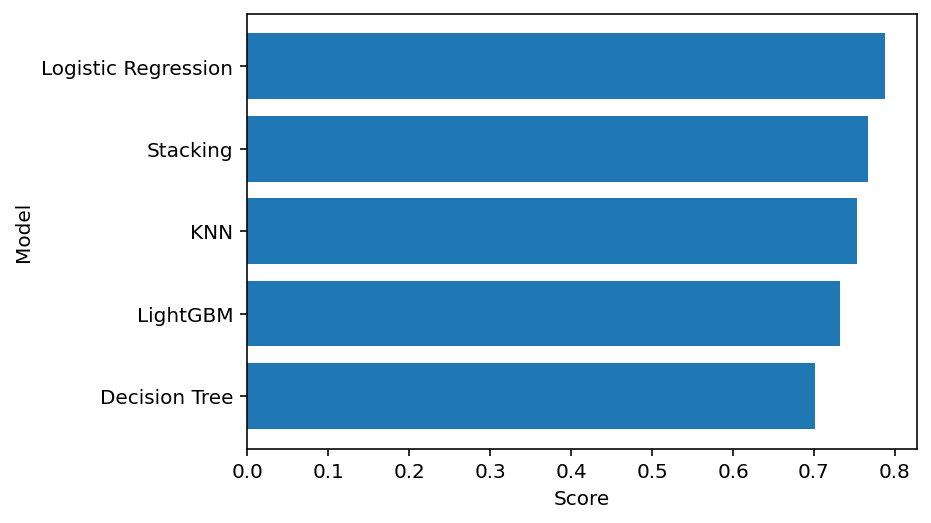

In [13]:
# 데이터프레임 만들기
df = pd.DataFrame.from_dict(result, orient='index', columns=['score'])
df.sort_values(by='score', ascending=True, inplace=True)

# 성능 비교
plt.barh(y=df.index, width=df['score'])
plt.xlabel('Score')
plt.ylabel('Model')
plt.show()